## Exploratory Data Analysis of Kaggle competition House Prices: Advanced Regression Techniques

[Competition page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials)

[Original kernel](https://www.kaggle.com/dgawlik/house-prices-eda)

In [22]:
# Import needed packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
sns.set()

In [2]:
# Load train and test.csv

train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [4]:
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Select quantitative and qualitative 

quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [7]:
print("Number of quantitative features:", len(quantitative))
print("Number of qualitative features:", len(qualitative))

Number of quantitative features: 36
Number of qualitative features: 43


In [8]:
quantitative
qualitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
# Explore datasets' sizes
print("# of samples in training set:", len(train))
print("# of samples in test set:", len(test))

# of samples in training set: 1460
# of samples in test set: 1459


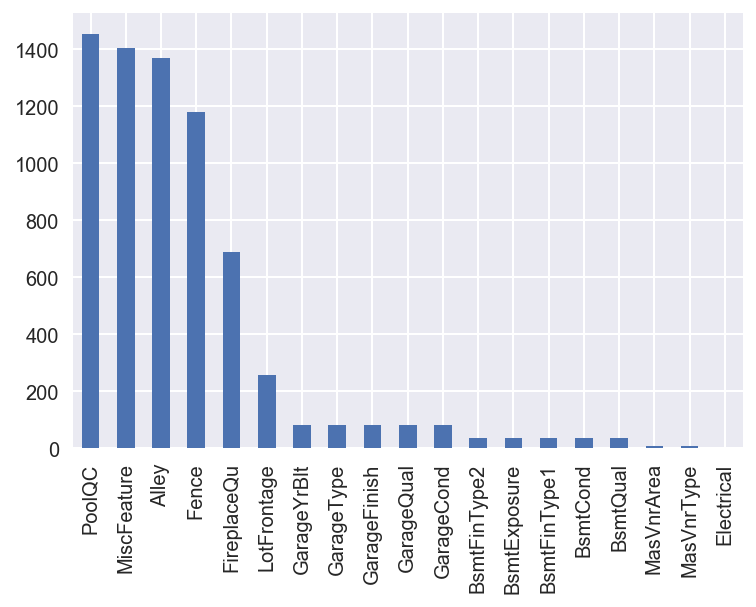

In [10]:
# Explore features with missing values
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()

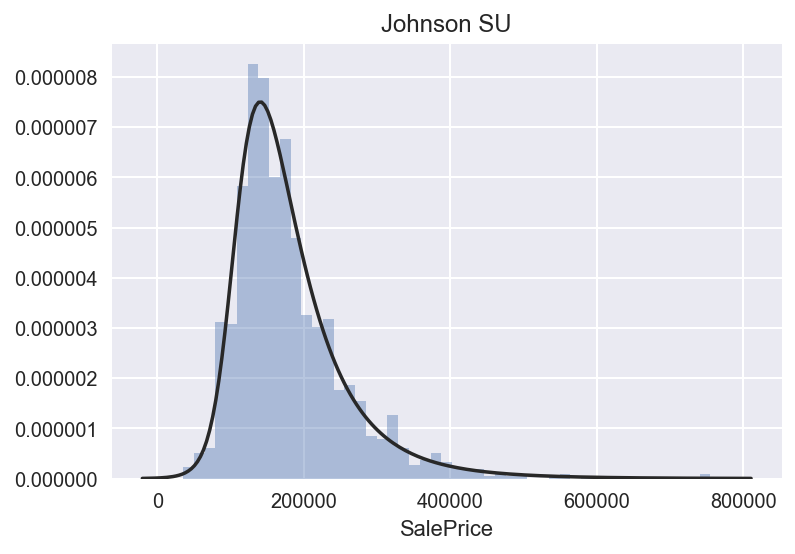

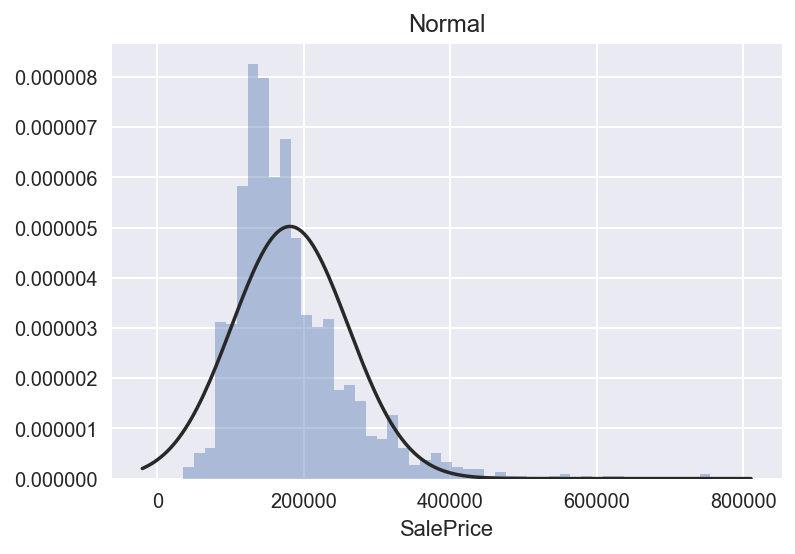

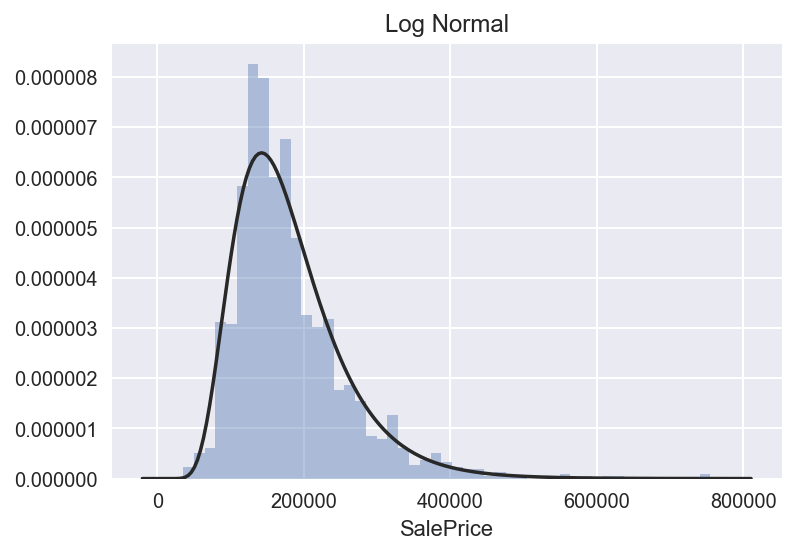

In [11]:
# Explore distribution of the target, SalePrice
import scipy.stats as st
y = train['SalePrice']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It appears that Johnson Su provides the best fit for the SalePrice

## Qualitative Features

In [12]:
# Test the quantitative variables for normality, using Shapiro Wilk, with alpha=0.01
# https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)

# True = reject null hypothesis (i.e., NOT normally distributed)
print(normal)

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool


Also none of quantitative variables has normal distribution so these should be transformed as well.

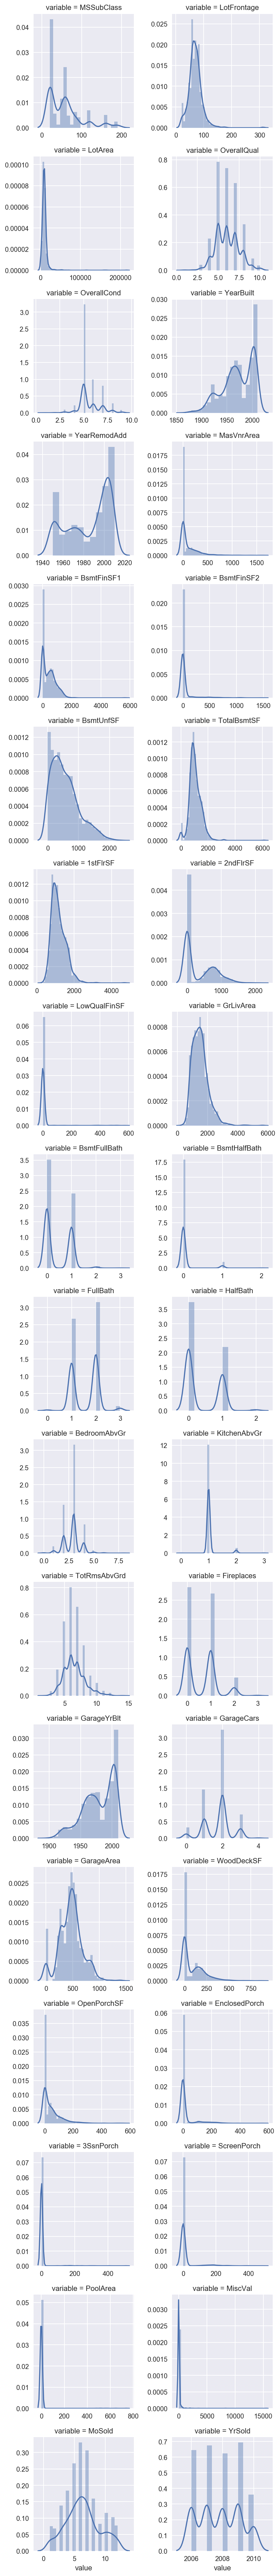

In [13]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Good candidates for log transformation
* LotFrontage
* LotArea
* TotalBsmtSF

## Categorical variables

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pand

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pand

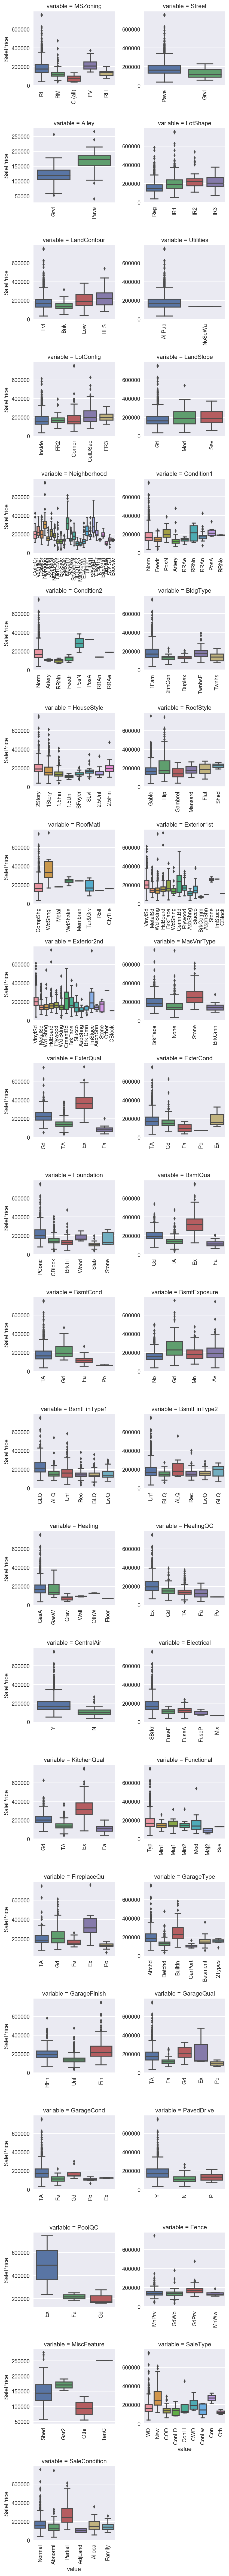

In [15]:
# Convert categorical features to dtype `categry` and fill missing
for c in qualitative:
    train[c] = train[c].astype('category')
    
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g.map(boxplot, "value", "SalePrice")

(Below) For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


/Users/luke/.virtualenvs/ml-python3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


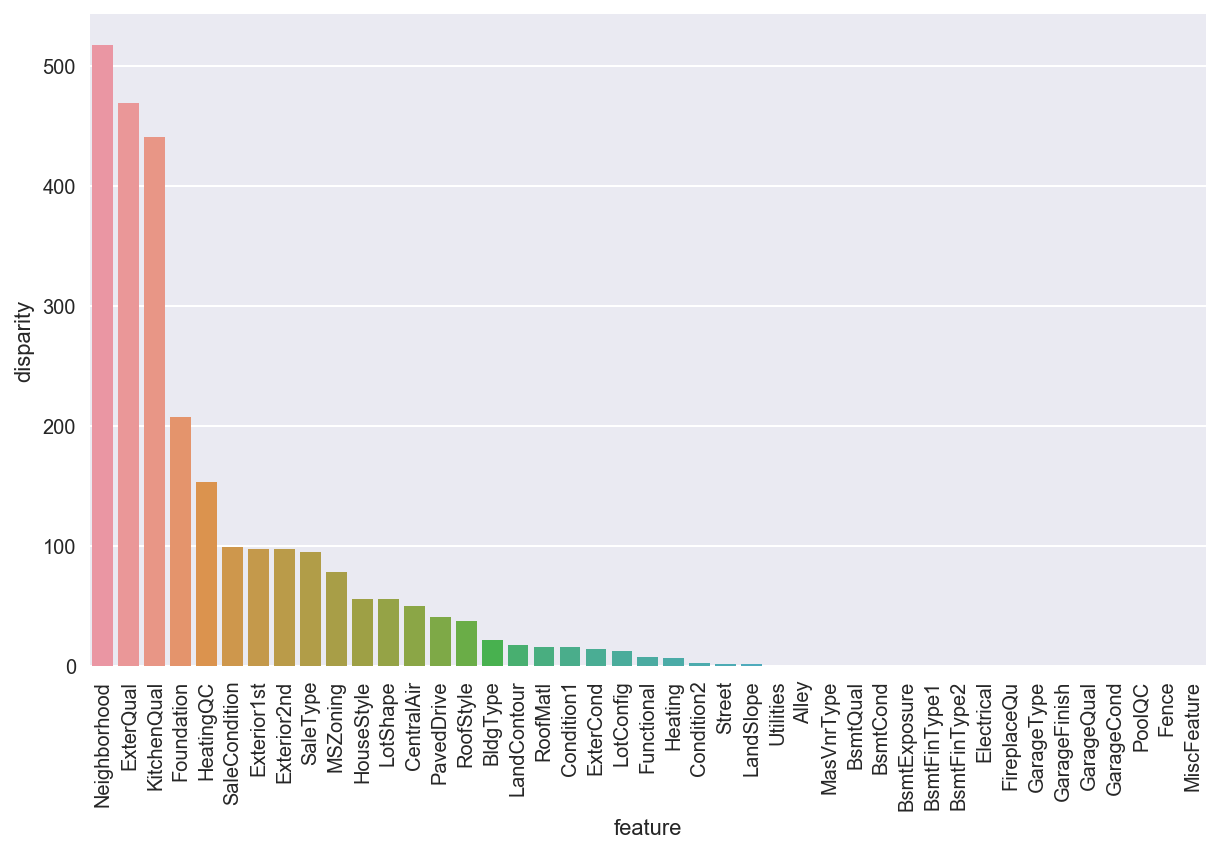

In [26]:
# Apply one-way ANOVA. For each feature, null hypothesis = no difference between mean SalePrice
# for each level
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(10, 6))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [27]:
# Encode categorical variables. For each categorical variable, order each level based on the mean SalePrice, 
# from lowest to highest. Then encode each level from 1 to N, and store the encoding in `feature`_E
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [28]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0


## Correlations
Generally to reduce confunding only variables uncorrelated with each other should be added to regression models (which are correlated with SalePrice).

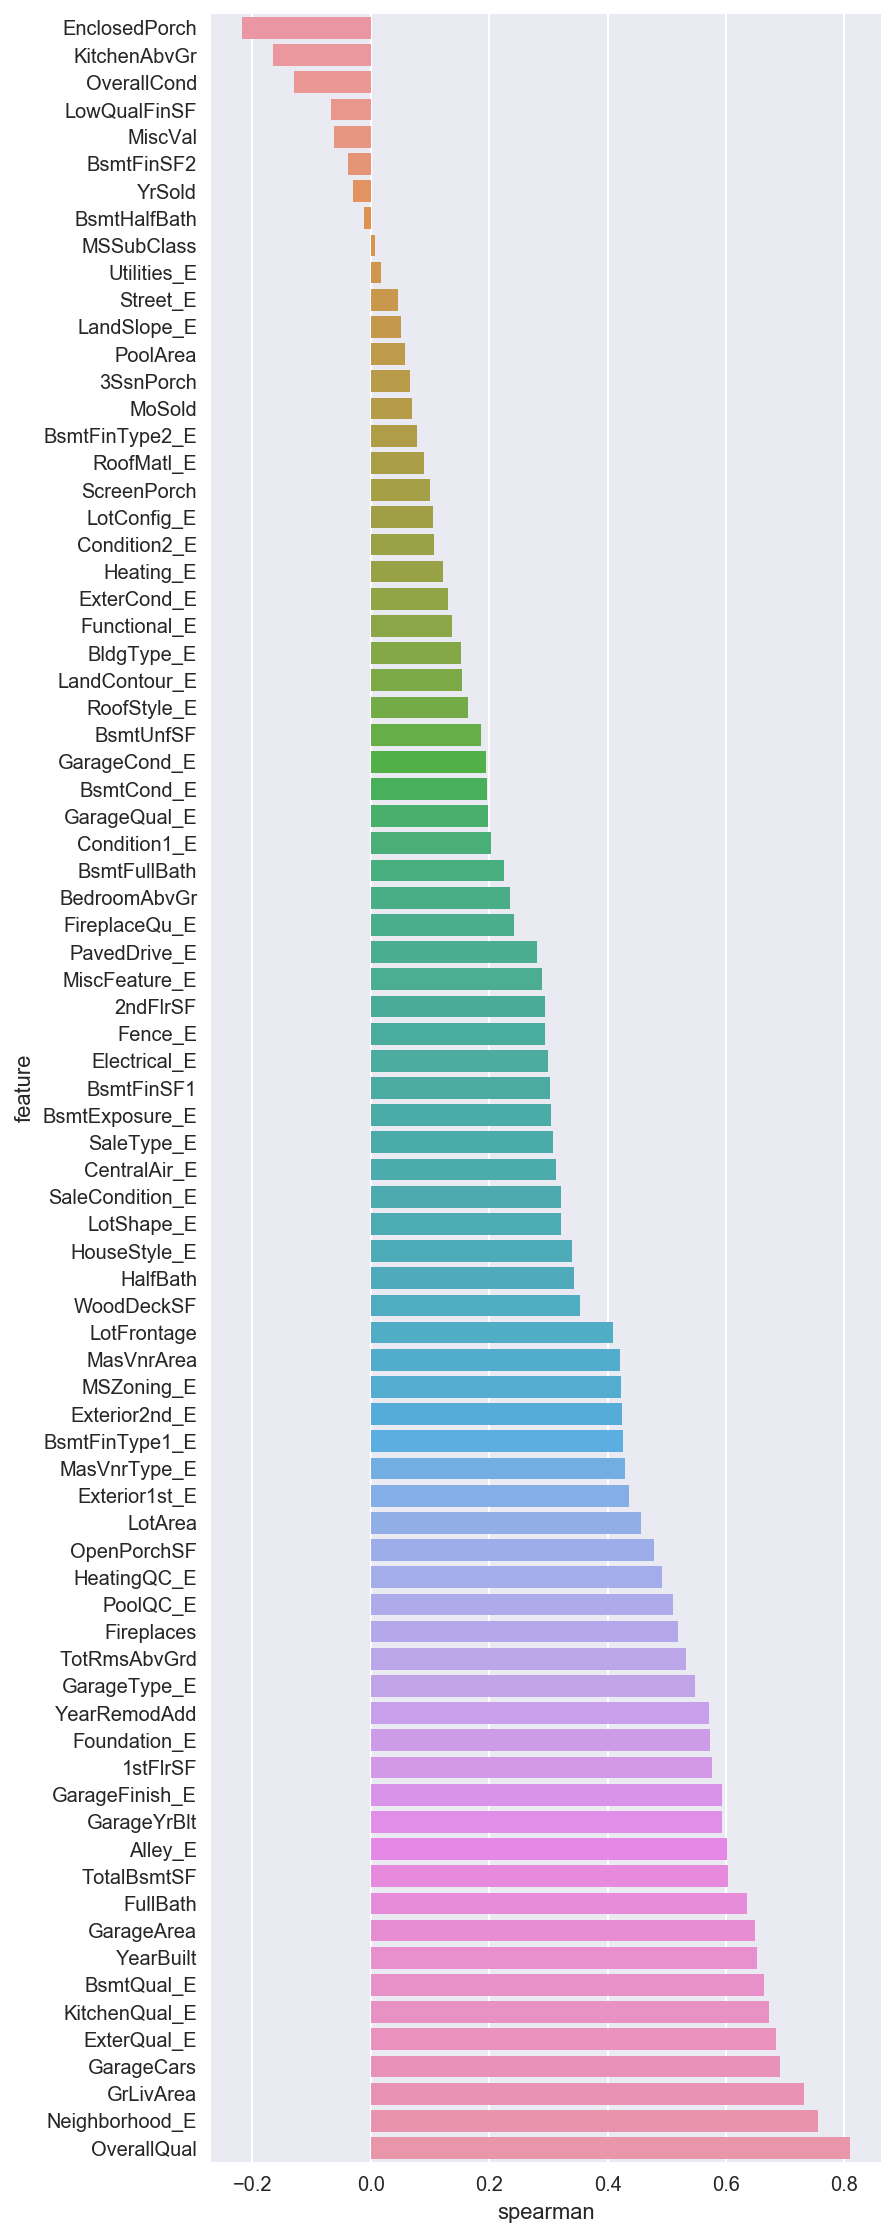

In [30]:
# Calculate the Spearman correlation between SalePrice and each variable
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [
        frame[f].corr(frame['SalePrice'], 'spearman') for f in features
    ]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25 * len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')


features = quantitative + qual_encoded
spearman(train, features)

OverallQal and Neighborhood (encoded) have the strongest positive correlation with SalePrice

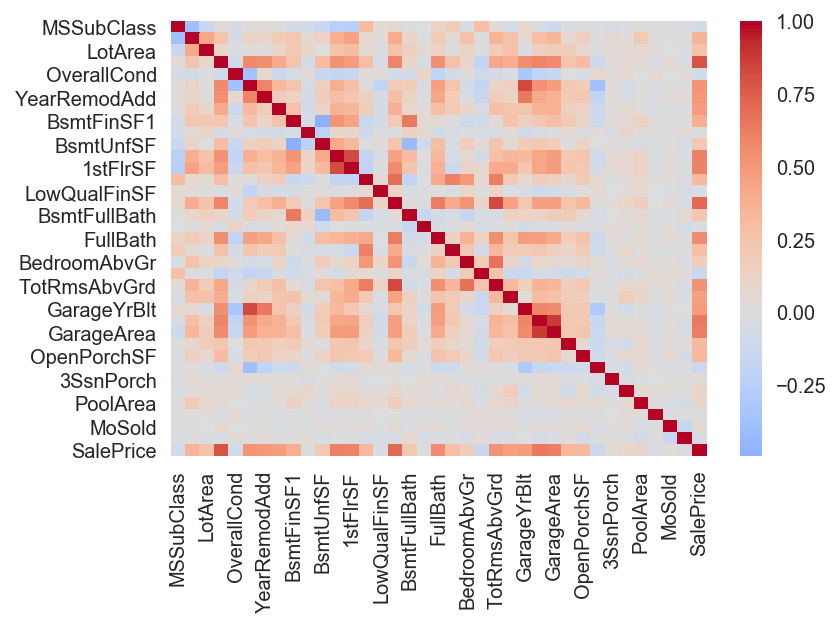

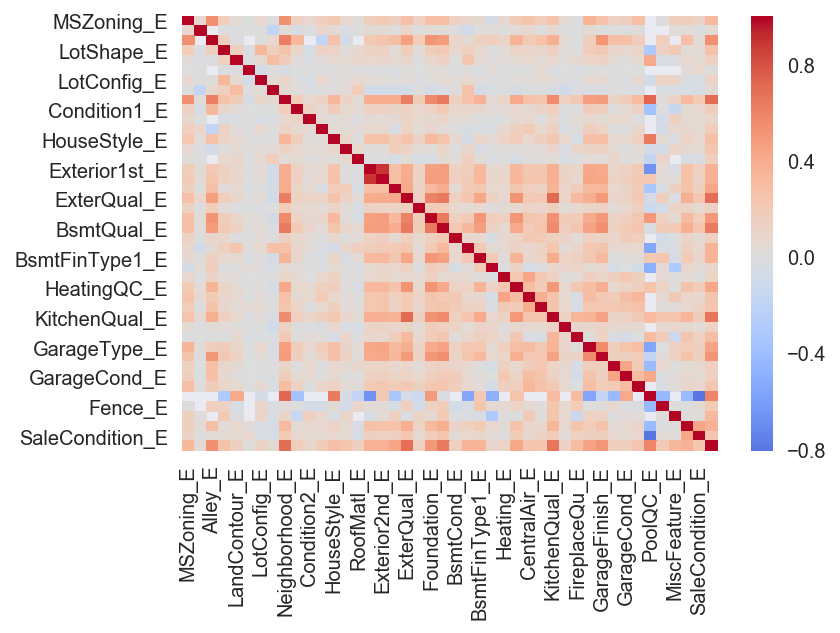

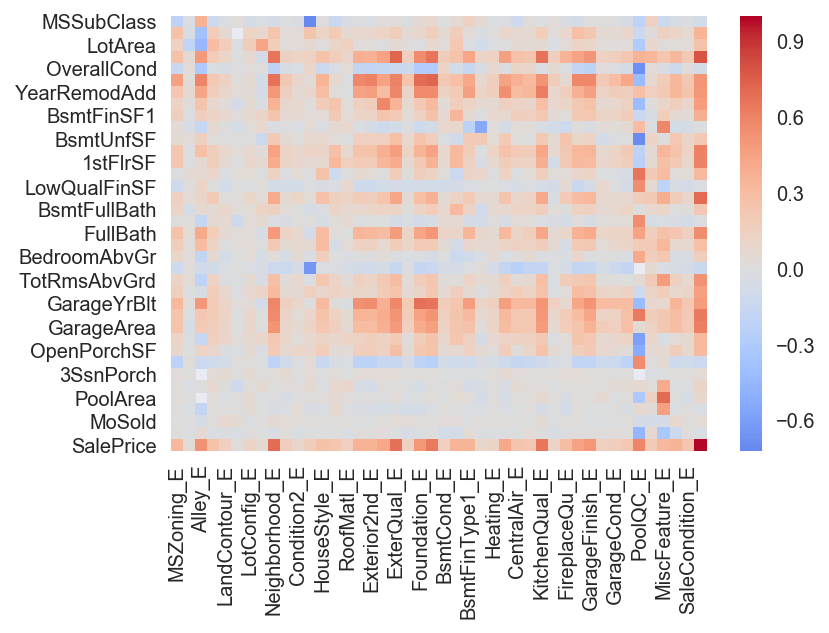

In [36]:

# Correlation between quantitative variables
plt.figure(1)
corr = train[quantitative + ['SalePrice']].corr()
sns.heatmap(corr, center=0., cmap="coolwarm")

# Correlation between qualitative variables
plt.figure(2)
corr = train[qual_encoded + ['SalePrice']].corr()
sns.heatmap(corr, center=0., cmap="coolwarm")

# Correlation between quantitative and qualitative variables

plt.figure(3)
corr = pd.DataFrame(
    np.zeros([len(quantitative) + 1,
               len(qualitative) + 1]),
    index=quantitative + ['SalePrice'],
    columns=qual_encoded + ['SalePrice'])
for q1 in quantitative + ['SalePrice']:
    for q2 in qual_encoded + ['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr, center=0., cmap="coolwarm")

In [38]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time':x, 'val':y})
    ts=ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
